In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.warn("once")
%matplotlib inline
#color = sns.color_palette()

# Graph 한글 표시, https://lsh-story.tistory.com/83
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="./korean.ttf").get_name()
rc('font',family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

print('Python version : ', sys.version)

Python version :  3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


# 1. 정형 데이터마이닝 (사용 데이터 : lotto)

### 1) 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오. 
###     단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다. 
###     그리고 변환된 데이터에서 가장 많이 등장한 
###     상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오.

    - 1.1.1) Transaction Data
        - transaction data == n Hot Encoding
        - get_dummies      == 1 Hot Encoding    
    - 1.1.2) 상위10개 로또번호, 막대그래프 

### 2) 변환한 데이터에 대해 apriori함수를 사용하여 다음 괄호 안의 조건을 반영하여 
###     연관규칙을 생성하고, 이를 ‘rules_1’이라는 변수에 저장하여 결과를 해석하시오. 
###     (최소 지지도 : 0.002, 최소 신뢰도 : 0.8, 최소조합 항목 수 : 2개, 최대조합 항목 수 : 6개) 
###     그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, 
###     이를 데이터프레임으로 변환하여 csv파일로 출력하시오.  
    1.2.1) rules_1
    1.2.2) 향상도 상위 30개, csv

### 3) 생성된 연관규칙 'rules_1'에 대한 정보를 해석하고, Q1)을 통해 확인했을 때 
###     가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 'rules_most_freq'라는 변수에 
###     저장하시오. 그리고 해당 규칙들을 해석하여 인사이트를 도출한 후 서술하시오.
    - 1.3.1) rules_1 해석
    - 1.3.2) rules_most_freq 도출, 해석, 인사이트
    

### 1.1.1) Transaction Data
- transaction data == n Hot Encoding
- get_dummies.... == 1 Hot Encoding

In [2]:
from mlxtend.preprocessing import TransactionEncoder  # Encoder 

In [3]:
df = pd.read_csv('./dataset/lotto.csv')
df

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44
...,...,...,...,...,...,...,...
854,5,16,24,29,40,41,42
855,4,14,27,30,31,40,42
856,3,11,16,19,21,27,31
857,2,9,13,21,25,32,42


In [4]:
df.drop('time_id', axis=1)

,num1,num2,num3,num4,num5,num6
0,8,22,35,38,39,41
1,9,13,32,38,39,43
2,6,10,16,28,34,38
3,10,24,40,41,43,44
4,8,15,17,19,43,44
...,...,...,...,...,...,...
854,16,24,29,40,41,42
855,14,27,30,31,40,42
856,11,16,19,21,27,31
857,9,13,21,25,32,42


In [5]:
nums = df.drop('time_id', axis=1).values
print(type(nums), nums.shape)
nums

<class 'numpy.ndarray'> (859, 6)


array([[ 8, 22, 35, 38, 39, 41],
       [ 9, 13, 32, 38, 39, 43],
       [ 6, 10, 16, 28, 34, 38],
       ...,
       [11, 16, 19, 21, 27, 31],
       [ 9, 13, 21, 25, 32, 42],
       [10, 23, 29, 33, 37, 40]])

In [6]:
# TransactionEncoder
te = TransactionEncoder()  
buf = te.fit(nums).transform(nums)

# array -> df
dft = pd.DataFrame(buf, columns=te.columns_)  # dft = df_transaction
print(dft.shape)
dft

(859, 45)


,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
857,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


### * Memo
r, mlxtend는 transaction 전처리가 필요하지만, apyori package는 필요 없음 (그래도 일단 구현함)

### 1.1.2) 상위10개 로또번호, 막대그래프 

In [7]:
df

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44
...,...,...,...,...,...,...,...
854,5,16,24,29,40,41,42
855,4,14,27,30,31,40,42
856,3,11,16,19,21,27,31
857,2,9,13,21,25,32,42


In [8]:
dfm = df.melt('time_id')  # df_melt, 고정행 제외값 merge(variable,value형태로)
dfm

,time_id,variable,value
0,859,num1,8
1,858,num1,9
2,857,num1,6
3,856,num1,10
4,855,num1,8
...,...,...,...
5149,5,num6,42
5150,4,num6,42
5151,3,num6,31
5152,2,num6,42


In [9]:
dfg = dfm.groupby('value')[['variable']].count() # df_groupby
print(type(dfg),dfg.shape)
dfg.head()

<class 'pandas.core.frame.DataFrame'> (45, 1)


,variable
value,
1,122
2,112
3,111
4,115
5,119


In [10]:
df10 = dfg.sort_values(by='variable', ascending=False)[:10].reset_index()
df10

,value,variable
0,34,134
1,40,126
2,27,126
3,43,125
4,20,124
5,17,123
6,12,123
7,1,122
8,14,122
9,10,122


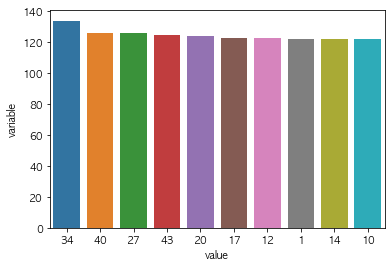

In [11]:
sns.barplot(data = df10, 
            x = 'value',
            y = 'variable', 
            order = df10['value']) #order미지정시, x의 오름차순 정렬됨(1,10,12...)

### * 해석
대부분의 번호가 비슷한 빈도로 추첨되었고, 34번이 가장 많이 추첨 되었다.

### Q2) 변환한 데이터에 대해 apriori함수를 사용하여 다음 괄호 안의 조건을 반영하여 
###     연관규칙을 생성하고, 이를 ‘rules_1’이라는 변수에 저장하여 결과를 해석하시오. 
###     (최소 지지도 : 0.002, 최소 신뢰도 : 0.8, 최소조합 항목 수 : 2개, 최대조합 항목 수 : 6개) 
###     그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, 
###     이를 데이터프레임으로 변환하여 csv파일로 출력하시오.  
    1.2.1) rules_1
    1.2.2) 향상도 상위 30개, csv

### 1.2.1) rules_1

### Apriori (연관분석 대표 알고리즘, 𝐴→𝐵)
- 설정값보다 큰 지지도를 갖는 항목의 데이터들를 찾아내서 연관 관계를 분석하는 알고리즘
- 연관규칙에서 사용하는 3가지 통계척도
    1. 지지도 (support)
        - 해당 규칙이 얼마나 의미있는지 보여줌.
        - 전체 거래에서 특정 물품 A와 B가 동시에 거래되는 비중
        - 지지도 = P(A∩B) =  (A, B 동시 발생 횟수) / 전체 횟수
    2. 신뢰도 (confidence)
        - 두 아이템의 연관규칙이 유용한 규칙일 가능성의 척도 
        - A를 포함하는 거래 중 A와 B가 동시에 거래되는 비중
        - 신뢰도 = P(A∩B) / P(A)        
    3. 향상도 (lift)
        - 두 아이템의 연관 규칙이 우연인지 아닌지를 나타내는 척도 
        - A라는 상품에서 신뢰도가 동일한 상품 B와 C가 존재할 때, 어떤 상품을 더 추천해야 좋을지 판단.
        - A와 B가 동시에 거래된 비중을 A와 B가 서로 독립된 사건일 때 동시에 거래된 비중으로 나눈 값
        - 향상도 = P(A∩B)/(P(A)P(B))
- 장점: 이해하기 쉬움, 조인 및 정리 단계는 대규모 DB의 항목 집합에서 쉽게 구현        
- 단점: 항목 집합이 클 경우 많은 리소스 필요함 전체 DB를 스캔 필요.
- Apriori 효율성 개선 방안
    1. 해시 기반 기술 : 이 메서드는 k-itemsets 및 해당 개수를 생성하기 위해 해시 테이블이라는 해시 기반 구조를 사용합니다.  
       테이블 생성을 위해 해시 함수를 사용합니다.
    2. 거래 감소 : 이 방법은 반복에서 스캔하는 트랜잭션 수를 줄입니다. 빈번한 항목이없는 거래는 표시되거나 제거됩니다.
    3. 분할 : 이 방법은 빈번한 항목 세트를 마이닝하기 위해 두 개의 데이터베이스 스캔 만 필요합니다.  
       데이터베이스에서 항목 집합이 잠재적으로 자주 발생하려면 데이터베이스의 파티션 중 하나 이상에서 자주 발생해야합니다.
    4. 견본 추출: 이 방법은 데이터베이스 D에서 무작위 샘플 S를 선택한 다음 S에서 빈번한 항목 집합을 검색합니다.  
       전역 빈번한 항목 집합이 손실 될 수 있습니다. 이는 min_sup을 낮추면 줄일 수 있습니다.
    5. 동적 항목 세트계산: DB를 스캔하는 동안 DB의 표시된 시작 지점에 새 후보 항목 집합을 추가 할 수 있습니다.
    
- Apriori 알고리즘의 응용
    1. 교육 분야에서 : 특성 및 전문성을 통해 입학 한 학생의 데이터 마이닝에서 연관 규칙을 추출합니다.
    2. 의료 분야 : 예를 들어 환자의 데이터베이스 분석.
    3. 임업 : 산불 데이터를 이용한 산불 발생 확률 및 강도 분석
    4. Apriori는 Amazon과 같은 많은 회사에서 추천 시스템 자동 완성 기능을 위해 Google에서 제공합니다.

https://ko.myservername.com/apriori-algorithm-data-mining    

In [12]:
from apyori import apriori # 연관분석, !pip install apyori

In [13]:
# sep:구분자(\t:tab), names:컬럼명, cp949(Windows에서 많이 사용)
dicts = pd.read_csv('./dataset/영화 기생충_사전.txt', sep = '\t', encoding = 'cp949', names = ['word'])
print(type(dicts))
dicts

<class 'pandas.core.frame.DataFrame'>


,word
0,기생충
1,봉준호
2,송강호
3,기택
4,이선균
5,박사장
6,조여정
7,연교
8,최우식
9,기우


In [14]:
df

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44
...,...,...,...,...,...,...,...
854,5,16,24,29,40,41,42
855,4,14,27,30,31,40,42
856,3,11,16,19,21,27,31
857,2,9,13,21,25,32,42


In [15]:
dfnum = df.drop('time_id', axis=1)
dfnum

,num1,num2,num3,num4,num5,num6
0,8,22,35,38,39,41
1,9,13,32,38,39,43
2,6,10,16,28,34,38
3,10,24,40,41,43,44
4,8,15,17,19,43,44
...,...,...,...,...,...,...
854,16,24,29,40,41,42
855,14,27,30,31,40,42
856,11,16,19,21,27,31
857,9,13,21,25,32,42


In [16]:
# https://shiningyouandme.tistory.com/37?category=807628
# https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

def get_aprioriRules(df, support, confidence, lift=None, minlen=1, maxlen=df.shape[1], DEBUG=0):    
    print('df_in',df.shape)
    print('min_supprot   ', support )
    print('min_confidence', confidence )
    print('minlen        ', minlen )
    print('maxlen        ', maxlen )
    association_rules = apriori(np.array(df),
                                min_support    = support,
                                min_confidence = confidence,
                                #min_lift       = lift,
                                min_length     = minlen,
                                max_length     = maxlen)
    results = list(association_rules)
    
    if DEBUG:
        print('len(results)', len(results))
        print('results[0]')
        for result in results[0]:
            print(type(result), result)
        display(pd.DataFrame(results) )
    
    dfr = pd.DataFrame( columns=['lhs', 'rhs', 'Support', 'Confidence', 'lift']) # df_rules
    
    for i, item in enumerate(results):  # parsing results
        rowBuf = []
        items = [x for x in item[2]]
        rowBuf.append(str(list(items[0][0]))) # lhs
        rowBuf.append(str(list(items[0][1]))) # rhs
        rowBuf.append(item[1])      # Supprot
        rowBuf.append(items[0][2])  # Confidence
        rowBuf.append(items[0][3])  # lift 
        dfr.loc[i] = rowBuf         # rowBuf = ['lhs','rhs','Support', Confidence','lift']        
    
    print('df_rules', dfr.shape)
    display(dfr)
    return dfr            

In [17]:
rules_1 = get_aprioriRules(dfnum, support=0.002, confidence=0.8, minlen=2 , maxlen=6)

df_in (859, 6)
min_supprot    0.002
min_confidence 0.8
minlen         2
maxlen         6
df_rules (394, 5)


,lhs,rhs,Support,Confidence,lift
0,"[1, 3, 43]",[12],0.002328,1.0,6.983740
1,"[1, 3, 15]",[25],0.002328,1.0,7.738739
2,"[25, 3, 20]",[1],0.002328,1.0,7.040984
3,"[1, 3, 29]",[37],0.002328,1.0,7.341880
4,"[1, 11, 5]",[18],0.002328,1.0,7.099174
...,...,...,...,...,...
389,"[40, 13, 14]","[26, 43]",0.002328,1.0,45.210526
390,"[26, 21, 14]","[18, 15]",0.002328,1.0,71.583333
391,"[40, 14, 30]","[27, 31]",0.002328,1.0,53.687500
392,"[19, 44, 21]","[34, 15]",0.002328,1.0,40.904762


### 1.2.2) 향상도 상위 30개, csv

In [18]:
df30 = rules_1.sort_values(by='lift', ascending=False)[:30].reset_index()
df30

,index,lhs,rhs,Support,Confidence,lift
0,393,"[16, 26, 31]","[43, 36]",0.002328,1.0,78.090909
1,390,"[26, 21, 14]","[18, 15]",0.002328,1.0,71.583333
2,387,"[26, 11, 36]","[17, 21]",0.002328,1.0,61.357143
3,386,"[10, 34, 22]","[36, 44]",0.002328,1.0,61.357143
4,384,"[18, 45, 6]","[38, 31]",0.002328,1.0,57.266667
5,385,"[31, 22, 7]","[24, 34]",0.002328,1.0,57.266667
6,388,"[12, 20, 15]","[24, 30]",0.002328,1.0,57.266667
7,391,"[40, 14, 30]","[27, 31]",0.002328,1.0,53.687500
8,389,"[40, 13, 14]","[26, 43]",0.002328,1.0,45.210526
9,392,"[19, 44, 21]","[34, 15]",0.002328,1.0,40.904762


In [19]:
# os.makedirs('./output')
df30.to_csv('./output/모의고사1(lotto).csv')
os.listdir('./output')

['bugs.txt', '모의고사1(lotto).csv']

### 해석
해당 조건으로 총 394개의 연관규칙이 생성되었다.

### Q3) 생성된 연관규칙 'rules_1'에 대한 정보를 해석하고, Q1)을 통해 확인했을 때 
###     가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 'rules_most_freq'라는 변수에 
###     저장하시오. 그리고 해당 규칙들을 해석하여 인사이트를 도출한 후 서술하시오.
    - 1.3.1) rules_1 해석
    - 1.3.2) rules_most_freq 도출, 해석, 인사이트
    

### 1.3.1) rules_1 해석

In [20]:
display( rules_1 )

,lhs,rhs,Support,Confidence,lift
0,"[1, 3, 43]",[12],0.002328,1.0,6.983740
1,"[1, 3, 15]",[25],0.002328,1.0,7.738739
2,"[25, 3, 20]",[1],0.002328,1.0,7.040984
3,"[1, 3, 29]",[37],0.002328,1.0,7.341880
4,"[1, 11, 5]",[18],0.002328,1.0,7.099174
...,...,...,...,...,...
389,"[40, 13, 14]","[26, 43]",0.002328,1.0,45.210526
390,"[26, 21, 14]","[18, 15]",0.002328,1.0,71.583333
391,"[40, 14, 30]","[27, 31]",0.002328,1.0,53.687500
392,"[19, 44, 21]","[34, 15]",0.002328,1.0,40.904762


In [21]:
rules_1.describe()

,Support,Confidence,lift
count,394.000000,394.0,394.000000
mean,0.002361,1.0,8.684778
std,0.000192,0.0,8.219259
min,0.002328,1.0,6.410448
25%,0.002328,1.0,7.040984
50%,0.002328,1.0,7.279661
75%,0.002328,1.0,7.669643
max,0.003492,1.0,78.090909


### 해석
로또 당첨번호를 의미하는 트랜잭션 데이터의 개수는 859개이며,  
이중 394개의 연관규칙이 생성되었고, 대부분 3개의 로또번호로 구성되었다.  
향상도 최대값은 78로 꽤 높게 나타났으며, 추첨번호들의 교집합 확률을  
의미하는 지지도의 평균은 0.002361로 나타났다.

### 1.3.2) rules_most_freq 도출, 해석, 인사이트
    - q1에서 가장많이 도출된 번호: 34

In [22]:
rules_most_freq = rules_1[rules_1['rhs'].isin(['[34]'])].reset_index()
rules_most_freq = rules_most_freq.drop(['index'], axis=1)
print(rules_most_freq.shape)
rules_most_freq

(16, 5)


,lhs,rhs,Support,Confidence,lift
0,"[1, 13, 5]",[34],0.002328,1.0,6.410448
1,"[2, 4, 31]",[34],0.003492,1.0,6.410448
2,"[2, 21, 15]",[34],0.002328,1.0,6.410448
3,"[2, 28, 15]",[34],0.002328,1.0,6.410448
4,"[13, 29, 5]",[34],0.002328,1.0,6.410448
5,"[17, 29, 5]",[34],0.002328,1.0,6.410448
6,"[31, 22, 7]",[34],0.002328,1.0,6.410448
7,"[24, 31, 7]",[34],0.002328,1.0,6.410448
8,"[12, 37, 36]",[34],0.002328,1.0,6.410448
9,"[25, 44, 14]",[34],0.002328,1.0,6.410448


In [23]:
rules_most_freq.reset_index()

,index,lhs,rhs,Support,Confidence,lift
0,0,"[1, 13, 5]",[34],0.002328,1.0,6.410448
1,1,"[2, 4, 31]",[34],0.003492,1.0,6.410448
2,2,"[2, 21, 15]",[34],0.002328,1.0,6.410448
3,3,"[2, 28, 15]",[34],0.002328,1.0,6.410448
4,4,"[13, 29, 5]",[34],0.002328,1.0,6.410448
5,5,"[17, 29, 5]",[34],0.002328,1.0,6.410448
6,6,"[31, 22, 7]",[34],0.002328,1.0,6.410448
7,7,"[24, 31, 7]",[34],0.002328,1.0,6.410448
8,8,"[12, 37, 36]",[34],0.002328,1.0,6.410448
9,9,"[25, 44, 14]",[34],0.002328,1.0,6.410448


### 해석
16개 규칙이 도출 됨. 0번 규칙을 보면 [1,13,5]번과 [34]번이 함께  
추첨될 확률은 support 확인 결과 약 0.28%(0.002328)이다.  
이 규칙의 lift(향상도)는 6.410448로 이는 [34]만 추첨됐을 때 보다  
[1,13,5]번이 뽑히고 [34]도 뽑힐 확률이 약 6배 높다는 것이다.  
  
하지만 이러한 규칙들은 로또번호가 추첨되는 순서를 고려하지 않고  
단순히 조합에 대한 확률만을 고려한 규칙이므로,  
향상도가 높은 숫자들의 조합이 로또 추첨번호가 될 가능성이 높은 것이 아니다.

# 2. 통계분석 (사용 데이터: FIFA)

### 1) FIFA데이터에서 각 선수의 키는 Heghit변수에 피트와 인치로 입력되어 있습니다.   
### 이를 cm로 변환하여 새로운 변수 Height_cm을 생성하시오.  
### “ ' ” 앞의 숫자는 피트이며, “ ' ” 뒤의 숫자는 인치, 1피트 = 30cm, 1인치 = 2.5cm)

In [24]:
df = pd.read_csv('./dataset/FIFA.csv', encoding = 'cp949')
df

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,238813,J. Lundstram,19,England,47,Crewe Alexandra,Right,Medium/ Medium,CM,22,2019,5'9,134,143,60,1
16638,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF,Right,Medium/ Medium,ST,21,2020,6'3,170,113,60,1
16639,241638,B. Worman,16,England,47,Cambridge United,Right,Medium/ Medium,ST,33,2021,5'8,148,165,60,1
16640,246268,D. Walker-Rice,17,England,47,Tranmere Rovers,Right,Medium/ Medium,RW,34,2019,5'10,154,143,60,1


In [25]:
df.info() # 16 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642 entries, 0 to 16641
Data columns (total 16 columns):
ID                      16642 non-null int64
Name                    16642 non-null object
Age                     16642 non-null int64
Nationality             16642 non-null object
Overall                 16642 non-null int64
Club                    16642 non-null object
Preferred_Foot          16642 non-null object
Work_Rate               16642 non-null object
Position                16642 non-null object
Jersey_Number           16642 non-null int64
Contract_Valid_Until    16642 non-null int64
Height                  16642 non-null object
Weight_lb               16642 non-null int64
Release_Clause          16642 non-null int64
Value                   16642 non-null int64
Wage                    16642 non-null int64
dtypes: int64(9), object(7)
memory usage: 2.0+ MB


In [26]:
df.isna().sum().sum()

0

In [27]:
df['Height'] 

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
16637     5'9
16638     6'3
16639     5'8
16640    5'10
16641    5'10
Name: Height, Length: 16642, dtype: object

In [28]:
buf_list = df['Height'].str.split("'")
cm = []
for buf in buf_list:
    cm.append( float(buf[0])*30 + float(buf[1])*2.5)   

In [29]:
df['Height_cm'] = cm
df['Height_cm'] = df['Height_cm'].round(4)
df[['Height', 'Height_cm']]

,Height,Height_cm
0,5'7,167.5
1,6'2,185.0
2,5'9,172.5
3,6'4,190.0
4,5'11,177.5
...,...,...
16637,5'9,172.5
16638,6'3,187.5
16639,5'8,170.0
16640,5'10,175.0


In [30]:
df.info()  # 17 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642 entries, 0 to 16641
Data columns (total 17 columns):
ID                      16642 non-null int64
Name                    16642 non-null object
Age                     16642 non-null int64
Nationality             16642 non-null object
Overall                 16642 non-null int64
Club                    16642 non-null object
Preferred_Foot          16642 non-null object
Work_Rate               16642 non-null object
Position                16642 non-null object
Jersey_Number           16642 non-null int64
Contract_Valid_Until    16642 non-null int64
Height                  16642 non-null object
Weight_lb               16642 non-null int64
Release_Clause          16642 non-null int64
Value                   16642 non-null int64
Wage                    16642 non-null int64
Height_cm               16642 non-null float64
dtypes: float64(1), int64(9), object(7)
memory usage: 2.2+ MB


### Q2) 포지션을 의미하는 Position변수를 아래 표를 참고하여 “Forward”, “Midfielder”, 
### “Defender”, “GoalKeeper”로 재범주화하고, factor형으로 변환하여 Position_Class 
### 라는 변수를 생성하고 저장하시오.

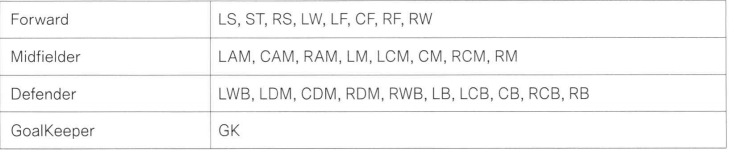

In [31]:
df

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,238813,J. Lundstram,19,England,47,Crewe Alexandra,Right,Medium/ Medium,CM,22,2019,5'9,134,143,60,1,172.5
16638,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF,Right,Medium/ Medium,ST,21,2020,6'3,170,113,60,1,187.5
16639,241638,B. Worman,16,England,47,Cambridge United,Right,Medium/ Medium,ST,33,2021,5'8,148,165,60,1,170.0
16640,246268,D. Walker-Rice,17,England,47,Tranmere Rovers,Right,Medium/ Medium,RW,34,2019,5'10,154,143,60,1,175.0


In [32]:
df.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LM', 'LB', 'RDM', 'RW',
       'CM', 'RB', 'RAM', 'CF', 'LAM', 'RWB', 'LWB'], dtype=object)

In [33]:
fw  = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
mf  = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']
dfn = ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
gk  = ['GK']

In [34]:
df.loc[df['Position'].isin(fw),  'Position_Class'] = 'Forward'   # 1)열생성 2)fw있는 행을 'Forward'로 Write 
df.loc[df['Position'].isin(mf),  'Position_Class'] = 'Midfielder'
df.loc[df['Position'].isin(dfn), 'Position_Class'] = 'Defender'
df.loc[df['Position'].isin(gk),  'Position_Class'] = 'GoalKeeper'

print(df.shape)
df[ ['Position', 'Position_Class']]

(16642, 18)


,Position,Position_Class
0,RF,Forward
1,ST,Forward
2,LW,Forward
3,GK,GoalKeeper
4,RCM,Midfielder
...,...,...
16637,CM,Midfielder
16638,ST,Forward
16639,ST,Forward
16640,RW,Forward


In [35]:
df['Position_Class'].value_counts()

Defender      6763
Midfielder    4935
Forward       3044
GoalKeeper    1900
Name: Position_Class, dtype: int64

### Q3) 새로 생성한 Position_Class 변수의 각 범주에 따른 Value(선수의 시장가치)의 
###      평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오. 
###      그리고 평균값의 차이가 통계적으로 유의하다면 사후검정을 수행하고 설명하시오.

### 포지션별 선수 시장가치 평균값이 통계적으로 유의한지 검정 위해 일원배치 분산분석 수행
    - 귀무가설: 4가지의 포지션에 대해 Value의 평균은 모두 같다.
    - 대립가설: 4가지 포지션에 대해 적어도 하나의 포지션에 대한 Value의 평균값에는 차이가 있다.

In [36]:
# anova (모의고사1-3)
import statsmodels.api as sm
from statsmodels.formula.api import ols      # r 스타일 fit
from statsmodels.stats.anova import anova_lm # anova
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [37]:
df

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5,Forward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0,Forward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5,Forward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,238813,J. Lundstram,19,England,47,Crewe Alexandra,Right,Medium/ Medium,CM,22,2019,5'9,134,143,60,1,172.5,Midfielder
16638,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF,Right,Medium/ Medium,ST,21,2020,6'3,170,113,60,1,187.5,Forward
16639,241638,B. Worman,16,England,47,Cambridge United,Right,Medium/ Medium,ST,33,2021,5'8,148,165,60,1,170.0,Forward
16640,246268,D. Walker-Rice,17,England,47,Tranmere Rovers,Right,Medium/ Medium,RW,34,2019,5'10,154,143,60,1,175.0,Forward


In [38]:
df.groupby(['Position_Class'])[['Value']].mean()

,Value
Position_Class,
Defender,2104.653260
Forward,3035.026281
GoalKeeper,1597.268421
Midfielder,2865.531915


In [39]:
model = ols('Value~Position_Class', df).fit()  # ols: r스타일 모형적합
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Position_Class,3.0,4.081181e+09,1.360394e+09,41.873906,5.988667e-27
Residual,16638.0,5.405330e+11,3.248786e+07,NaN,NaN


### 해석
분산분석표를 통해 확인한 결과, SSA의 자유도는 3(집단의 수 -1 = 4-1)  
SST의 자유도는 16638(관측값의 수 - 집단의 수 = 16642-4)임을 확인.  
p값은 매우 작아 유의수준 0.05하에서 귀무가설을 기각한다. 

즉 따라서 포지션별 시장가치가 모두 동일하지 않다고 결론.  
포지션별 시장가치의 평균값들 중 적어도 어느 하나의 포지션은  
통계적으로 유의한 차이가 있다고 말할 수 있다.

### 사후검정
어떠한 포지션이 선수의 시장가치 차이가 있는지 파악하기 위해 사후검정을 수행

In [40]:
posthoc = pairwise_tukeyhsd(df['Value'], df['Position_Class'], alpha=0.05)
print(posthoc)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1     group2    meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
  Defender    Forward    930.373  0.001   610.7429  1250.0031   True
  Defender GoalKeeper  -507.3848 0.0034  -887.6261  -127.1436   True
  Defender Midfielder   760.8787  0.001   486.7123   1035.045   True
   Forward GoalKeeper -1437.7579  0.001 -1865.9234 -1009.5923   True
   Forward Midfielder  -169.4944 0.5609  -506.9991   168.0104  False
GoalKeeper Midfielder  1268.2635  0.001   872.8782  1663.6488   True
--------------------------------------------------------------------


### 해석
사후검정에서는 귀무가설을 '집단들 사이의 평균은 같다', 대립가설을 '집단들 사이의 평균은  
같지않다'로 두고,모든 집단 수준에 대해서 두 집단씩 짝을 지어 각각 다중 비교를 수행한다.  
  
사후검정 결과를 보면 Midfielder~Forward 간의 비교에 대해 p값이 0.05보다 크므로   
귀무가설을 기각하지 않는다. 즉, Midfielder와 Forward간의 시장가치는 통계적으로  
유의한 차이가 있다고 볼수 없다.  

그러나 다른 모든 포지션 간의 비교에 대해서는 p값이 0.05보다 작으므로 각각의 비교에  
대한 귀무가설을 모두 기각한다. 즉 해당 포지션에 대한 시장가치 평균값은 각각 통계적으로  
유의한 차이가 있다.  

또한 meandiff는 왼쪽 집단과 오른쪽 집단간의 반응값의 차이를 나타내며,  
양수인 경우 오른쪽의 평균이 더 높다.

### Q4) Preferred Foot(주로 사용하는 발)과 Position_Class(재범주화 된 포지션)변수에 
###      따라 Value(이적료)의 차이가 있는지를 알아보기 위해 이원배치분산분석을 
###      수행하고 결과를 해석하시오.

### 귀무가설 
    - 선수의 발에 따른 선수의 가치에는 차이가 없다.  
    - 선수의 포지션에 따른 선수의 가치에는 차이가 없다.  
    - 발과 포지션간의 상호작용 효과가 없다.  

### 대립가설
    - 선수의 발에 따른 선수의 가치에는 차이가 있다. 
    - 선수의 포지션에 따른 선수의 가치에는 차이가 있다.  
    - 발과 포지션간의 상호작용 효과가 있다. 

In [41]:
model = ols('Value ~ Position_Class * Preferred_Foot', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Position_Class,3.0,4.081181e+09,1.360394e+09,41.912369,5.658225e-27
Preferred_Foot,1.0,1.522715e+08,1.522715e+08,4.691332,3.032930e-02
Position_Class:Preferred_Foot,3.0,4.736156e+08,1.578719e+08,4.863874,2.207249e-03
Residual,16634.0,5.399071e+11,3.245805e+07,NaN,NaN


### 해석
이원배치 분산분석 결과 5% 유의수준 하에서 주발의 유의확률은 0.03390,  
포지션의 유의확률은 2e-16로 귀무가설을 기각하여 대립가설을 선택한다.  

즉 주발과 포지션은 선수의 연봉의 차이에 영향을 미치고 있으며,  
주발과 포지션은 상호작용효과를 갖고 있다.  

단 이원배치 분산분석을 통해 연봉 변동의 원인이 주발과 포지션이라는 것은  
알 수 있으나, 이 요소가 어느방향(+,-)으로 영향을 주는지 알 수 없다.

### 5)Age, Overall, Wage, Height_cm, Weight_lb 가 Value에 영향을 미치는지 
### 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [42]:
df

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5,Forward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0,Forward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5,Forward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,238813,J. Lundstram,19,England,47,Crewe Alexandra,Right,Medium/ Medium,CM,22,2019,5'9,134,143,60,1,172.5,Midfielder
16638,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF,Right,Medium/ Medium,ST,21,2020,6'3,170,113,60,1,187.5,Forward
16639,241638,B. Worman,16,England,47,Cambridge United,Right,Medium/ Medium,ST,33,2021,5'8,148,165,60,1,170.0,Forward
16640,246268,D. Walker-Rice,17,England,47,Tranmere Rovers,Right,Medium/ Medium,RW,34,2019,5'10,154,143,60,1,175.0,Forward


In [43]:
features = ['Age', 'Overall',  'Wage', 'Height_cm', 'Weight_lb']
df_x = df[features]
y = df['Value'].values
print(f'df_x {df_x.shape}, {type(df_x)}')
display(df_x.head(2))
print(f'y {y.shape}, {type(y)}')

df_x (16642, 5), <class 'pandas.core.frame.DataFrame'>


,Age,Overall,Wage,Height_cm,Weight_lb
0,31,94,565,167.5,159
1,33,94,405,185.0,183


y (16642,), <class 'numpy.ndarray'>


In [44]:
def get_stepwise(df_x, y, SL_in=0.05, SL_out = 0.05): # SL:유의수준
    init_list = list(df_x.columns)  # init feature list
    best_list = []                  # best feature list 
    i=0
    while (len(init_list)>0):                
        var_list = list(set(init_list)-set(best_list)) # feature_list, (set:No Index)
        pValue = pd.Series(index=var_list)             # var_list => pval의 행인덱스
        for var in var_list:                         
            model = sm.OLS(y, sm.add_constant(df_x[best_list+[var]])).fit()
            pValue[var] = model.pvalues[var]
        pValue_min = pValue.min()

        print(f'step%d'%i,'\nvar_list', var_list )
        print(f'pValue_min of var_list : {pValue.idxmin()}({np.round(pValue_min,5)})')
        i=i+1              
        if(pValue_min<SL_in):                 # pValue_min 유의할 경우
            best_list.append(pValue.idxmin()) # pValue(series조합)의 idxmin()은 var_list중 1개 원소
            while(len(best_list)>0):  
                best_list_with_constant = sm.add_constant(df_x[best_list]) 
                pValueBest = sm.OLS(y, best_list_with_constant).fit().pvalues[1:]
                pValue_max = pValueBest.max() 
                if(pValue_max >= SL_out): # pValue_Max가 0.05보다 크면, best_list에서 제거 
                    excluded_feature = pValueBest.idxmax()  # 
                    best_list.remove(excluded_feature)
                else:       # pValue_Max가 0.05보다 작으면, break 
                    print(f'pValue_max of best_list: {pValueBest.idxmax()}({np.round(pValue_max,5)})')
                    print('best_list', best_list, '\n')
                    break 
        else:  # p_value가 유의하지 않으면(0.05보다 작으면) break
            print(f'\nBreak(pValue_min > 0.05)')
            print(f'best_list = {best_list}')
            break
    return best_list 

In [45]:
get_stepwise(df_x, y)

step0 
var_list ['Overall', 'Height_cm', 'Age', 'Weight_lb', 'Wage']
pValue_min of var_list : Overall(0.0)
pValue_max of best_list: Overall(0.0)
best_list ['Overall'] 

step1 
var_list ['Weight_lb', 'Height_cm', 'Age', 'Wage']
pValue_min of var_list : Age(0.0)
pValue_max of best_list: Overall(0.0)
best_list ['Overall', 'Age'] 

step2 
var_list ['Weight_lb', 'Height_cm', 'Wage']
pValue_min of var_list : Wage(0.0)
pValue_max of best_list: Overall(0.0)
best_list ['Overall', 'Age', 'Wage'] 

step3 
var_list ['Weight_lb', 'Height_cm']
pValue_min of var_list : Height_cm(0.00615)
pValue_max of best_list: Height_cm(0.00615)
best_list ['Overall', 'Age', 'Wage', 'Height_cm'] 

step4 
var_list ['Weight_lb']
pValue_min of var_list : Weight_lb(0.34171)

Break(pValue_min > 0.05)
best_list = ['Overall', 'Age', 'Wage', 'Height_cm']


['Overall', 'Age', 'Wage', 'Height_cm']

변수선택법을 수행한 결과 ['Overall', 'Age', 'Wage', 'Height_cm'] 조합이 최적의 모형이다.  
이 변수들을 선택하여 회귀분석을 실시한다.

In [46]:
model = ols('Value ~ Overall + Wage + Age + Height_cm', df).fit()
anova_lm(model)

model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.791      
Dependent Variable: Value            AIC:                309167.6615
Date:               2021-09-11 13:50 BIC:                309206.2600
No. Observations:   16642            Log-Likelihood:     -1.5458e+05
Df Model:           4                F-statistic:        1.572e+04  
Df Residuals:       16637            Prob (F-statistic): 0.00       
R-squared:          0.791            Scale:              6.8474e+06 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept  -8690.8178 588.2795 -14.7733 0.0000 -9843.9084 -7537.7273
Overall      241.3450   4.0018  60.3096 0.0000   233.5011   249.1889
Wage         184.1837   1.1278 163.3165 0.0000   181.9731   186.3942
Age         -202.1603   4.9384 -40.9362 0.0000  -211.8401  -192.4805
Height_cm     -8.4446   3.0821  -2.7399 0.0062   -14.4858    -2.4034
--------------------------------------------------------------------
Omnibus:             17089.038     Durbin-Watson:        1.407      
Prob(Omnibus):       0.000         Jarque-Bera (JB):     3525378.426
Skew:                4.665         Prob(JB):             0.000      
Kurtosis:            73.690        Condition No.:        5577       
====================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

### 해석
- 모형은 y = -8690.818 + 184.184*Wage + 241.345*Overall -202.160*Age -8.446*Height_cm
- 모형의 결정계수와 수정된 결정계수는 0.79이다. 
    - 즉, 다변량 회귀식은 전체 데이터의 80%를 설명하고 있다.
- 또한, F통계량은 유의수준 0.05보다 작음으로 모형이 통계적으로 유의하다는 것을 알 수 있다

# 3. 비정형 데이터마이닝 (사용 데이터 : "영화 review")
    - 영화 기생충_review.txt (다음 영화 리뷰데이터)
    - 영화 기생충_사전.txt (출연진/캐릭터/감독 이름데이터)

### Q1) ‘영화 기생충_review.txt’ 데이터를 읽어온 뒤 숫자, 특수 문자 등을 
###    제거하는 전처리 작업을 시행하시오. 
###   그리고 ‘영화 기생충_review.txt’을 사전에 등록하라.
    - 3.1.1) ‘영화 기생충_review.txt’, 숫자, 특수문자 제거
    - 3.1.2) ‘영화 기생충_review.txt’, 사전에 등록

In [47]:
# text, 모의고사 1-3
import konlpy  # !pip install konlpy
import re
from konlpy.tag import Komoran  # No JVM shared 에러 -> https://www.azul.com/downloads
from sklearn.feature_extraction.text import CountVectorizer # text 인스턴스 생성

# WordCloud 모의고사 1-3
from wordcloud import WordCloud # !pip install wordcloud
from collections import Counter # 단어 Count
import nltk
from nltk.corpus import stopwords


###  3.1.1) ‘영화 기생충_review.txt’, 숫자, 특수문자 제거

In [48]:
file = open('./dataset/영화 기생충_review.txt', 'r', encoding='cp949')
print(type(file))
file

<class '_io.TextIOWrapper'>


<_io.TextIOWrapper name='./dataset/영화 기생충_review.txt' mode='r' encoding='cp949'>

In [49]:
line = file.read()
print(type(line))
print(len(line))
line

<class 'str'>
54157


"별1개  준 사람들은   나베당임\n역쉬\n영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..\n지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb!!!\n대단한 영화. 몰입력 장난아님. 후아\n그닥\n칸하고 안맞나봄.\n봉준호식의 코메디와 사회비판 페이소스\n좋았습니다\n군더더기 없이 깔끔한 영화, 지금도 영화가 주는 메세지를 생각하는 중입니다\n볼만 했어요\n막 조조보고 나옴. 기가 막힌 블랙코미디. 시간 가는줄 모르고 집중하게 됨..보고 나서 더 생각나는 영화.여지껏 봉준호 영화 중 최고다\n전  재미었어요.생각 하게끔 만드는 영화\n올만에 한국영화 강추\n영화가 끝나고 생각함을 주는영화\n이건 진짜 봉준호 천재~~\n김태호 무한도전보고 천재라  생각했는데..\n다른분야 같은 레벨~!!\n더불어 살 순 없을까 ㅠㅠ\n블랙코미디 굉장히 찝찝하고 숙연해진다\n나름\n몰입!\n기대하고 갔는데\n개인적으로 별로다 \n불편하다\n시간가는 줄 모르고 정말 재밌게 봤습니다.\n풍자를 기가막히게 잘 표현한 것 같습니다.\n아마 2019년 최고작\n송강호 나오면 무조건 보는데 역시나 믿고 보는 배우 역시 한국인들 대단해 방탄에 이어 영화까지 세계인의 마음을 사로잡다\ngood\n일반국민이던  배충이던  모두봐야할  영화\n칸영화제 수상과는 별개로...... 개인적으로 영화가 끝나고 기립박수를 치고 싶었습니다\n봉준호 감독님에게 경의를 표하고 싶습니다.\n당장은 어렵더라도. 기우의 바램이 이루어지는 세상을 향해.\n뉴스로 닿지 않을 것을 전달해내는 과연 봉테일.\n묵직하게. 잘 받았습니다, 오버.\n두번 다시 봉준호 영화는 거른다..!!\n재밌어요~\n재미있고 상징적인 상업영화인데\n행위예술같은 고급스러움도 있어요~\n물론 반지하 장면은 좀 지저분하지만\n그게 현실이니까\n너무 재밌게 봤고 두번은 더 볼꺼예요~♡♡\n오랜만에 잘 만들어진 영화를 봤네요~.\n대사 중에 불필요한 ㅇㅅ이 많아서 아쉬웠음\n글쎄..........\n503

In [50]:
line = line.split('\n')
print(type(line))
print(len(line))
line

<class 'list'>
1791


['별1개  준 사람들은   나베당임',
 '역쉬',
 '영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..',
 '지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb!!!',
 '대단한 영화. 몰입력 장난아님. 후아',
 '그닥',
 '칸하고 안맞나봄.',
 '봉준호식의 코메디와 사회비판 페이소스',
 '좋았습니다',
 '군더더기 없이 깔끔한 영화, 지금도 영화가 주는 메세지를 생각하는 중입니다',
 '볼만 했어요',
 '막 조조보고 나옴. 기가 막힌 블랙코미디. 시간 가는줄 모르고 집중하게 됨..보고 나서 더 생각나는 영화.여지껏 봉준호 영화 중 최고다',
 '전  재미었어요.생각 하게끔 만드는 영화',
 '올만에 한국영화 강추',
 '영화가 끝나고 생각함을 주는영화',
 '이건 진짜 봉준호 천재~~',
 '김태호 무한도전보고 천재라  생각했는데..',
 '다른분야 같은 레벨~!!',
 '더불어 살 순 없을까 ㅠㅠ',
 '블랙코미디 굉장히 찝찝하고 숙연해진다',
 '나름',
 '몰입!',
 '기대하고 갔는데',
 '개인적으로 별로다 ',
 '불편하다',
 '시간가는 줄 모르고 정말 재밌게 봤습니다.',
 '풍자를 기가막히게 잘 표현한 것 같습니다.',
 '아마 2019년 최고작',
 '송강호 나오면 무조건 보는데 역시나 믿고 보는 배우 역시 한국인들 대단해 방탄에 이어 영화까지 세계인의 마음을 사로잡다',
 'good',
 '일반국민이던  배충이던  모두봐야할  영화',
 '칸영화제 수상과는 별개로...... 개인적으로 영화가 끝나고 기립박수를 치고 싶었습니다',
 '봉준호 감독님에게 경의를 표하고 싶습니다.',
 '당장은 어렵더라도. 기우의 바램이 이루어지는 세상을 향해.',
 '뉴스로 닿지 않을 것을 전달해내는 과연 봉테일.',
 '묵직하게. 잘 받았습니다, 오버.',
 '두번 다시 봉준호 영화는 거른다..!!',
 '재밌어요~',
 '재미있고 상징적인 상업영화인데',
 '행위예술같은 고급스러움도 있어요~',
 '

In [51]:
text = pd.Series(line)
print(type(text))
print(text.shape)
text

<class 'pandas.core.series.Series'>
(1791,)


0                                별1개  준 사람들은   나베당임
1                                                역쉬
2            영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..
3       지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb!!!
4                              대단한 영화. 몰입력 장난아님. 후아
                           ...                     
1786                            와 내 앞으로도 4명이나 있네 ;;
1787                          좌파폭도고발영화.전라도까는 내용이었어.
1788                          언제나 기대되는 봉준호감독의 영화!!!
1789                            이번에도 매우 매우 기대됩니다!!!
1790                                               
Length: 1791, dtype: object

In [52]:
# re.sub(find, replace, data) 패턴문자대체
# https://jdh5202.tistory.com/394
text = text.map(lambda x: re.sub(r"\d", " ", x))  # r"\d", r은 \d를 문자 그대로 인식
text = text.map(lambda x: re.sub("!!", " ", x))  # r"\d", r은 \d를 문자 그대로 인식
movie_clean = text.map(lambda x: re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》;]', ' ', x))
movie_clean

0                               별 개  준 사람들은   나베당임
1                                               역쉬
2           영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다  
3       지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음   Bomb  
4                             대단한 영화  몰입력 장난아님  후아
                           ...                    
1786                           와 내 앞으로도  명이나 있네   
1787                         좌파폭도고발영화 전라도까는 내용이었어 
1788                          언제나 기대되는 봉준호감독의 영화  
1789                            이번에도 매우 매우 기대됩니다  
1790                                              
Length: 1791, dtype: object

전처리 시행 후 쓸모없는 빈칸이나 대문자, 구두점, 숫자, 공백이 제거 되었음을 확인할 수 있다.  
그리고 이를 movie_clean이라는 객체에 저장하였다.

### 3.1.2) ‘영화 기생충_review.txt’, 사전에 등록

### Q2) 영화 기생충_사전.txt를 단어 사전으로 하는 TDM을 구축하고 빈도를 파악하고 시각화하시오

In [53]:
# sep:구분자(\t:tab), names:컬럼명, cp949(Windows에서 많이 사용)
dicts = pd.read_csv('./dataset/영화 기생충_사전.txt', sep = '\t', encoding = 'cp949', names = ['word'])
print(type(dicts))
dicts

<class 'pandas.core.frame.DataFrame'>


,word
0,기생충
1,봉준호
2,송강호
3,기택
4,이선균
5,박사장
6,조여정
7,연교
8,최우식
9,기우


tm을 사용하기 위해서는 CountVectorizer()함수의 사용이 필요하다.  
따라서 이를 먼저 시행한 후에 cv_matrix을 이용하여 TDM을 구축해야한다.

In [54]:
cv = CountVectorizer() # 텍스트에서 단어 출현횟수를 카운팅한 벡터
cv.fit(dicts['word'])  # 사전으로 fitbuf

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [55]:
# 문서로 tdm 생성
cv_matrix = cv.transform(text) # Series -> 매트릭스로 변경
print(type(cv_matrix))
cv_matrix

<class 'scipy.sparse.csr.csr_matrix'>


<1791x17 sparse matrix of type '<class 'numpy.int64'>'
	with 155 stored elements in Compressed Sparse Row format>

In [56]:
name = cv.get_feature_names()  # 단어목록 확인
name

['기생충',
 '기우',
 '기정',
 '기택',
 '박사장',
 '박서준',
 '박소담',
 '봉준호',
 '송강호',
 '연교',
 '이선균',
 '이정은',
 '이지혜',
 '장혜진',
 '조여정',
 '최우식',
 '충숙']

In [57]:
cv_mat = cv_matrix.toarray()
print(type(cv_mat))
print(cv_mat.shape)
cv_mat

<class 'numpy.ndarray'>
(1791, 17)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
tdm = pd.DataFrame(cv_mat, columns = name)
tdm

,기생충,기우,기정,기택,박사장,박서준,박소담,봉준호,송강호,연교,이선균,이정은,이지혜,장혜진,조여정,최우식,충숙
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# 빈도 계산
tdm_freq = tdm.sum(axis=0).sort_values(ascending=False)  #axis=0 열, axis=1 행
tdm_freq

봉준호    79
송강호    31
기생충    21
이선균    10
조여정    10
최우식     4
이정은     3
박소담     2
장혜진     1
박사장     1
기정      1
이지혜     0
연교      0
박서준     0
기택      0
기우      0
충숙      0
dtype: int64

cv패키지의 transform과 get_feature_names()함수를 활용해 전처리를 하고  
tdm dataframe에 저장했다.  
단어별 빈도를 내림차순으로 정렬하여 tdm_freq에 저장하고 단어 빈도를 체크했다.

이후 단어 빈도를 바탕으로 막대그래프를 작성한다.

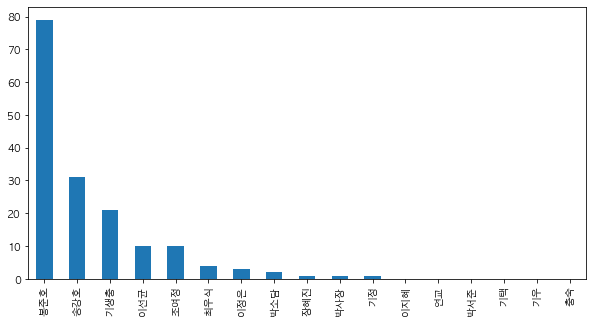

In [60]:
# 시각화
tdm_freq.plot(kind = 'bar', figsize=(10,5))
plt.show()

barplot을 그린 결과 봉준호 감독에 대한 언급이 가장 많았고 그 다음 송강호, 기생충, 이선균 순이었다.

In [61]:
komoran = Komoran(userdic='bugs.txt')
komoran

In [62]:
string = ' '.join(text)
print(type(string))
print(len(string))
string

<class 'str'>
54068


"별 개  준 사람들은   나베당임 역쉬 영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다.. 지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb ! 대단한 영화. 몰입력 장난아님. 후아 그닥 칸하고 안맞나봄. 봉준호식의 코메디와 사회비판 페이소스 좋았습니다 군더더기 없이 깔끔한 영화, 지금도 영화가 주는 메세지를 생각하는 중입니다 볼만 했어요 막 조조보고 나옴. 기가 막힌 블랙코미디. 시간 가는줄 모르고 집중하게 됨..보고 나서 더 생각나는 영화.여지껏 봉준호 영화 중 최고다 전  재미었어요.생각 하게끔 만드는 영화 올만에 한국영화 강추 영화가 끝나고 생각함을 주는영화 이건 진짜 봉준호 천재~~ 김태호 무한도전보고 천재라  생각했는데.. 다른분야 같은 레벨~  더불어 살 순 없을까 ㅠㅠ 블랙코미디 굉장히 찝찝하고 숙연해진다 나름 몰입! 기대하고 갔는데 개인적으로 별로다  불편하다 시간가는 줄 모르고 정말 재밌게 봤습니다. 풍자를 기가막히게 잘 표현한 것 같습니다. 아마     년 최고작 송강호 나오면 무조건 보는데 역시나 믿고 보는 배우 역시 한국인들 대단해 방탄에 이어 영화까지 세계인의 마음을 사로잡다 good 일반국민이던  배충이던  모두봐야할  영화 칸영화제 수상과는 별개로...... 개인적으로 영화가 끝나고 기립박수를 치고 싶었습니다 봉준호 감독님에게 경의를 표하고 싶습니다. 당장은 어렵더라도. 기우의 바램이 이루어지는 세상을 향해. 뉴스로 닿지 않을 것을 전달해내는 과연 봉테일. 묵직하게. 잘 받았습니다, 오버. 두번 다시 봉준호 영화는 거른다..  재밌어요~ 재미있고 상징적인 상업영화인데 행위예술같은 고급스러움도 있어요~ 물론 반지하 장면은 좀 지저분하지만 그게 현실이니까 너무 재밌게 봤고 두번은 더 볼꺼예요~♡♡ 오랜만에 잘 만들어진 영화를 봤네요~. 대사 중에 불필요한 ㅇㅅ이 많아서 아쉬웠음 글쎄..........      최순실 잔당이 블랙리스트로 말려 죽이려한 감독과 대배우. 그들에게 최고의 명예를 세계

In [63]:
nouns = komoran.nouns(string) # string -> split noun
print(type(nouns))
print(len(nouns))
nouns

<class 'list'>
7912


['개',
 '사람',
 '베',
 '역',
 '영화',
 '가슴',
 '충격',
 '지금',
 '감독',
 '작품',
 '압축',
 '느낌',
 '영화',
 '입력',
 '장난',
 '후',
 '학',
 '칸',
 '봉준호',
 '식',
 '코',
 '메',
 '디',
 '사회',
 '비판',
 '페이',
 '소스',
 '군더더기',
 '영화',
 '지금',
 '영화',
 '메세지',
 '생각',
 '중',
 '볼',
 '조조',
 '기가',
 '블랙',
 '코미디',
 '시간',
 '줄',
 '집중',
 '영화',
 '봉준호',
 '영화',
 '중',
 '최고',
 '영화',
 '만',
 '한국',
 '영화',
 '강',
 '추',
 '영화',
 '생각',
 '영화',
 '이건',
 '봉준호',
 '천재',
 '김태호',
 '무한도전',
 '천재',
 '생각',
 '분야',
 '레벨',
 '블랙',
 '코미디',
 '나름',
 '몰입',
 '기대',
 '개인',
 '불편',
 '시간',
 '풍자',
 '기가',
 '표현',
 '것',
 '년',
 '최고',
 '작',
 '송강호',
 '배우',
 '한국인',
 '방탄',
 '영화',
 '세계인',
 '마음',
 '일반',
 '국민',
 '배',
 '충',
 '영화',
 '칸',
 '영화제',
 '수상',
 '별개',
 '개인',
 '영화',
 '기립박수',
 '봉준호',
 '감독',
 '경의',
 '당장',
 '기우',
 '바램',
 '세상',
 '뉴스',
 '것',
 '전달',
 '봉',
 '테이',
 '오버',
 '번',
 '봉준호',
 '영화',
 '상징',
 '상업',
 '영화',
 '행위',
 '예술',
 '고급',
 '지하',
 '장면',
 '현실',
 '번',
 '꺼',
 '예',
 '요',
 '오랜만',
 '영화',
 '대사',
 '중',
 '불필요',
 '최순',
 '실',
 '잔당',
 '블랙리스트',
 '감독',
 '대배우',
 '최고',
 '명예',
 '세계',
 '영화제',
 '잔당'

In [64]:
cnt = Counter(nouns)
print(type(cnt))
print(len(cnt))
cnt

<class 'collections.Counter'>
2059


Counter({'개': 7,
         '사람': 51,
         '베': 5,
         '역': 5,
         '영화': 514,
         '가슴': 16,
         '충격': 9,
         '지금': 8,
         '감독': 125,
         '작품': 53,
         '압축': 1,
         '느낌': 37,
         '입력': 1,
         '장난': 2,
         '후': 13,
         '학': 6,
         '칸': 37,
         '봉준호': 138,
         '식': 8,
         '코': 5,
         '메': 2,
         '디': 2,
         '사회': 34,
         '비판': 3,
         '페이': 2,
         '소스': 2,
         '군더더기': 1,
         '메세지': 15,
         '생각': 120,
         '중': 17,
         '볼': 6,
         '조조': 7,
         '기가': 5,
         '블랙': 14,
         '코미디': 20,
         '시간': 37,
         '줄': 18,
         '집중': 5,
         '최고': 48,
         '만': 38,
         '한국': 33,
         '강': 10,
         '추': 13,
         '이건': 6,
         '천재': 15,
         '김태호': 1,
         '무한도전': 1,
         '분야': 1,
         '레벨': 1,
         '나름': 3,
         '몰입': 32,
         '기대': 82,
         '개인': 14,
         '불편': 39,
     

In [65]:
df_freq10 = pd.DataFrame(columns = ['명사', '빈도'])
freq_list = cnt.most_common(10)
freq_list

[('영화', 514),
 ('봉준호', 138),
 ('감독', 125),
 ('것', 124),
 ('생각', 120),
 ('기대', 82),
 ('수', 82),
 ('기생충', 78),
 ('연기', 68),
 ('현실', 61)]

In [66]:
for i,freq in enumerate(freq_list):
    df_freq10.loc[i] = freq
df_freq10  

,명사,빈도
0,영화,514
1,봉준호,138
2,감독,125
3,것,124
4,생각,120
5,기대,82
6,수,82
7,기생충,78
8,연기,68
9,현실,61


In [67]:
words_buf = dict(cnt.most_common(30))
words_buf

{'영화': 514,
 '봉준호': 138,
 '감독': 125,
 '것': 124,
 '생각': 120,
 '기대': 82,
 '수': 82,
 '기생충': 78,
 '연기': 68,
 '현실': 61,
 '송강호': 60,
 '봉': 60,
 '배우': 54,
 '작품': 53,
 '사람': 51,
 '거': 50,
 '최고': 48,
 '장면': 47,
 '상': 46,
 '듯': 45,
 '황금종려상': 41,
 '점': 40,
 '불편': 39,
 '만': 38,
 '안': 38,
 '느낌': 37,
 '칸': 37,
 '시간': 37,
 '번': 36,
 '스토리': 35}

In [68]:
# 2글자 이상만 추출
words = words_buf.copy()
for key in words_buf.keys():
    if len(key)==1:
        del(words[key])
words
        

{'영화': 514,
 '봉준호': 138,
 '감독': 125,
 '생각': 120,
 '기대': 82,
 '기생충': 78,
 '연기': 68,
 '현실': 61,
 '송강호': 60,
 '배우': 54,
 '작품': 53,
 '사람': 51,
 '최고': 48,
 '장면': 47,
 '황금종려상': 41,
 '불편': 39,
 '느낌': 37,
 '시간': 37,
 '스토리': 35}

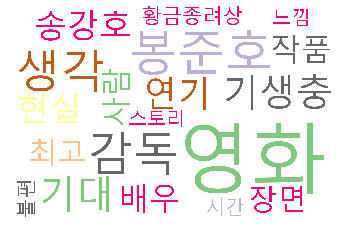

In [69]:
wordcloud = WordCloud(font_path = "./korean.ttf", background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

봉준호 감독에 대한 명사 등 영화 전체적인 관심이 동시에 감독에 대한 관심으로 표현되고  
있음을 알 수 있으나, 불편과 같은 부정적인 감정에 대한 언급도 적지 않음을 알 수 있다.